In [1]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install wordcloud
!pip install xgboost
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 98.7 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 3.5.4
    Uninstalling Sphinx-3.5.4:
      Successfully uninstalled Sphinx-3.5.4
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=d53c29ac82916aac56793defbf94065fdc066046acfb3543aabccb1faa41766e
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 0s (277 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 123105 files and directories currently

In [79]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Loading The Data SET**

In [3]:
path= "/content/drive/MyDrive/Resumes"

for(root,dirs,file) in os.walk(path):
    for f in file:
        if '.docx' and '.doc' in f:
            print(f)

In [14]:
file_1 = []
category_1 = []

directory = "/content/drive/MyDrive/Project_Resume/Resumes"
for i in os.listdir(directory):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory, i)
        file_1.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
        category_1.append('React JS Developer Resume')

In [16]:
file_1, category_1

(['Ui-Developer/ React JS Developer \n\nNAME: KRISHNA \n\nPROFESSIONAL SUMMARY:\n\n\t\tOver all 3.2 years of Extensive experience as a\xa0React JS/Web-\xa0Developer\xa0and 1 year\xa0of Experience as\xa0React JS Software Developer.\n\n\t\tExtensive experience in developing web pages using\xa0HTML, XML, CSS, JavaScript, React JS, Redux, JSON.\n\n\t\tExperience in all phase of\xa0SDLC\xa0like\xa0Requirement Analysis, Implementation\xa0and\xa0Maintenance,\xa0and extensive experience with\xa0Agile\xa0and\xa0SCRUM.\n\n\t\tExtensive knowledge in developing single - page applications\xa0(SPAs).\n\n\t\tGood Expertise in analyzing the\xa0Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles\xa0across cross-browser using\xa0Fire Bug,\xa0Developer Tool Bar.\n\n\t\tExpertise in\xa0React JS\xa0framework to develop the\xa0SPA.\n\n\t\tExperienced in\xa0React JS\xa0and working with\xa0React Flux architecture.\n\n\t\tExperienced in working with\xa0redux architect

In [13]:
file2 = []
category2=[]

directory = "/content/drive/MyDrive/Project_Resume/Resumes/Peoplesoft resumes"
for i in os.listdir(directory):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory, i)
        file2.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
        category2.append('Peoplesoft Resume')

In [17]:
file2, category2

(['PeopleSoft Administration\n\n \n\nVivekanand Sayana                                                                                                                                                                                                           \t\n\n\n\nCareer Objective: \n\n\n\nWith my valid expertise of 7.5 years in PeopleSoft, I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability\n\n\n\nProfessional Summary:\n\n\n\nOver 7.5 years of experience in PeopleSoft implementation, Support, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PeopleTools Upgrades, Application Updates, PUM, SES and Elastic Search. \n\

In [18]:
file3 =[]
category3 = []

directory = "/content/drive/MyDrive/Project_Resume/Resumes/SQL Developer Lightning insight"
for i in os.listdir(directory):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory, i)
        file3.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
        category3.append('SQL Developer Lightning insight')

In [19]:
file3, category3

(['SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOPER\n\nB. vinod kumar\n\n\n\nOBJECTIVE:\n\nWilling to work under a challenging and professional environment with exposure to new technologies as an SQL and MSBI developer in the area of SQL SERVER 2014, 2016 with Enterprise Portal and where there is a scope for Organizational growth as well as individual growth.\n\nProfessional summary:\n\n\t\tHaving around 2.2Years of IT Experience in Microsoft Business Intelligence (MSBI) under SQL server environment, with through knowledge of SQL server 2014,2016 databases.\n\n\t\tExtensive experience on Joins, Set Operators, Table Variables, Temporary Tables, CTE & Sub Queries.\n\n\t\tGood experience in writing Simple and sample SQL queries.\n\n\t\tExperience in Developing Stored Procedures and User defined functions.\n\n\t\tHands on Experience Triggers , views, cursor and synonyms.\n\n\t\tExperience on Writing SQL using joins, sub queries.\n\n\t\tGood at generating multiple reports using SSRS from SQ

In [20]:
file4=[]
category4=[]

directory = "/content/drive/MyDrive/Project_Resume/Resumes/workday resumes"
for i in os.listdir(directory):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory, i)
        file4.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
        category4.append('Workday Resumes')

In [21]:
file4,category4

(['VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\n\n\n\nPROFSSIONAL SUMMARY:\n\n\t\n\nOver all 3 years of IT experience as a Workday Consultant.\n\nIntegral in maintenance and creation of Workday Supervisory Organizations, Business Process, Locations, Positions, Company, Cost centers, and Hierarchies.\n\nExperience in understanding the Client Business Requirements, Organizational Hierarchy Setup, Configurable Security Setup and Tenant Setup.\n\nWorked with different Staffing Models, defining Hire restrictions to Job Management, Position Management.\n\nHands on experience with Compensation Module like creating Compensation Grades, Compensation Eligibility Rules, Allowance Plans, Salary Plans, Hourly Plans.\n\nExperience in creating Job Profiles, Job Families, and Job Family Group.\n\nExperience with Workday security groups like Role based security, User based Security, Intersection, and Job based Security.\n\nExperience with creating Staffing models for Supervisory Orgs, Reorganizations

In [22]:
data1 = pd.DataFrame(data= file_1, columns=['Resumes'])
data1['category_1'] = category_1
data1

,Resumes,category_1
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
3,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume
4,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume
5,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume
6,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
7,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
8,\n CURRICULUM VIT...,React JS Developer Resume
9,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume


In [23]:
data2 = pd.DataFrame(data= file2, columns=['Resumes'])
data2['category2'] = category2
data2

,Resumes,category2
0,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft Resume
1,\n PEOPLESOFT Adminis...,Peoplesoft Resume
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft Resume
3,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft Resume
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft Resume
5,\nRahul Ahuja\n-------------------------------...,Peoplesoft Resume
6,\n PeopleSoft Admin/Peo...,Peoplesoft Resume
7,\n PeopleSoft Database Ad...,Peoplesoft Resume
8,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft Resume
9,Classification: Internal\n\nClassification: In...,Peoplesoft Resume


In [24]:
data3 = pd.DataFrame(data= file3, columns=['Resumes'])
data3['category3'] = category3
data3

,Resumes,category3
0,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning insight
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight
2,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning insight
3,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning insight
4,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning insight
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight
6,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning insight
7,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning insight
8,BUDDHA VAMSI ...,SQL Developer Lightning insight
9,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning insight


In [25]:
data4= pd.DataFrame(data= file4, columns=['Resumes'])
data4['category4'] = category4
data4

,Resumes,category4
0,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resumes
1,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resumes
2,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resumes
3,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resumes
4,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resumes
5,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resumes
6,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resumes
7,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resumes
8,Workday HCM Techno functional Consultant ...,Workday Resumes
9,\nShireesh ...,Workday Resumes


In [26]:
data= data1.append([data2,data3,data4],ignore_index=True)
data

<ipython-input-26-1a711a5f7b18>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data= data1.append([data2,data3,data4],ignore_index=True)


,Resumes,category_1,category2,category3,category4
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,NaN,NaN,NaN
3,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,NaN,NaN,NaN
4,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\n[pic] Name...,NaN,NaN,NaN,Workday Resumes
75,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes
76,Mooraboyina Guravaiah\n\nWorkday Integration S...,NaN,NaN,NaN,Workday Resumes
77,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes


In [27]:
data['Category'] = category_1 + category2 + category3 + category4

In [28]:
data

,Resumes,category_1,category2,category3,category4,Category
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\n[pic] Name...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes,Workday Resumes
76,Mooraboyina Guravaiah\n\nWorkday Integration S...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
77,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


# **EDA**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     79 non-null     object
 1   category_1  24 non-null     object
 2   category2   20 non-null     object
 3   category3   14 non-null     object
 4   category4   21 non-null     object
 5   Category    79 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [30]:
data.isnull().sum()

Resumes        0
category_1    55
category2     59
category3     65
category4     58
Category       0
dtype: int64

In [31]:
data.duplicated().sum()

0

In [32]:
data.dtypes

Resumes       object
category_1    object
category2     object
category3     object
category4     object
Category      object
dtype: object

In [33]:
data.describe()

,Resumes,category_1,category2,category3,category4,Category
count,79,24,20,14,21,79
unique,79,1,1,1,1,4
top,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Peoplesoft Resume,SQL Developer Lightning insight,Workday Resumes,React JS Developer Resume
freq,1,24,20,14,21,24


In [34]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation,remove URLs and remove words containing numbers.'''
    text = text.lower()                                                             # Convert all characters in the string to lower case
    text = re.sub('[^a-zA-Z]', ' ', text)                                           # Remove non-english characters,punctuation and numbers
    text = re.sub('RT|cc', ' ', text)                                               # Remove RT and cc
    text = re.sub('http\S+\s*', ' ',text)                                           # Remove URLs
    text = re.sub('#\S+', '', text)                                                 # Remove hashtag
    text =  re.sub('\s+', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = nltk.tokenize.word_tokenize(text)                                        # tokenization
    text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(text)

clean = lambda x: clean_text(x)

In [35]:
data['Resumes'] = data.Resumes.apply(clean)

In [36]:
data

,Resumes,category_1,category2,category3,category4,Category
0,ui developer react js developer name krishna p...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,md khizaruddin rauf experience currently worki...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,pragnya pattnaik expertise around years experi...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,venkatalakshmi pedireddy software developer ex...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,kotani durga prasad objective aspirant positio...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,pic name j sumanth royal professional summary ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,harikrishna akula summary years experience aro...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
76,mooraboyina guravaiah workday integration spec...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
77,venkateswarlu b workday consultant years exper...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


In [37]:
data.to_csv('RESUMES.csv',index=False)

In [38]:
data.Category.value_counts()

React JS Developer Resume          24
Workday Resumes                    21
Peoplesoft Resume                  20
SQL Developer Lightning insight    14
Name: Category, dtype: int64

# **Data Visualization**

In [39]:
Counts = data['Category'].value_counts().reset_index()['Category']
Labels  = data['Category'].value_counts().reset_index()['index']

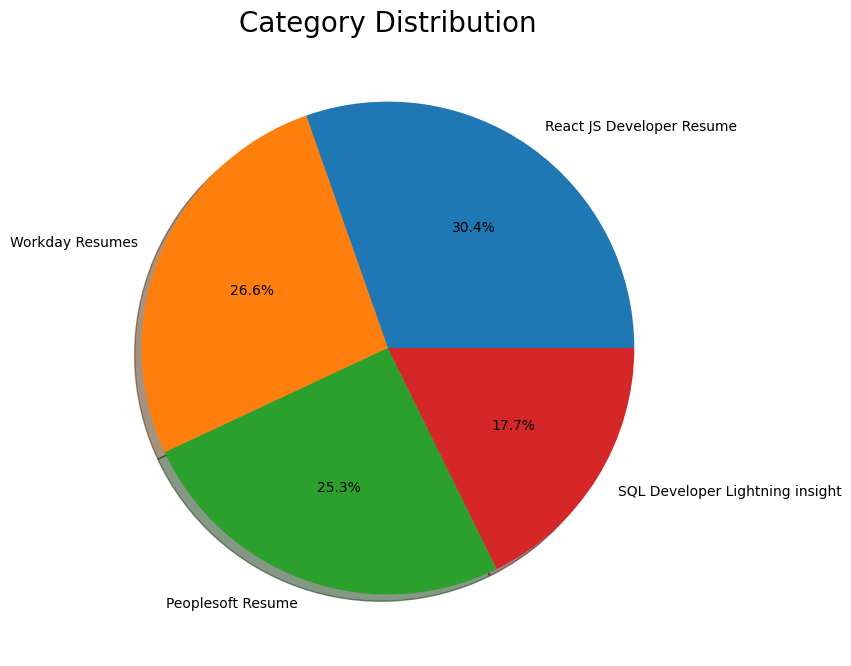

In [40]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(8,8))
plt.title('Category Distribution',fontsize=20)
source_pie = plt.pie(Counts, labels=Labels, autopct='%1.1f%%', shadow=True)
plt.show()

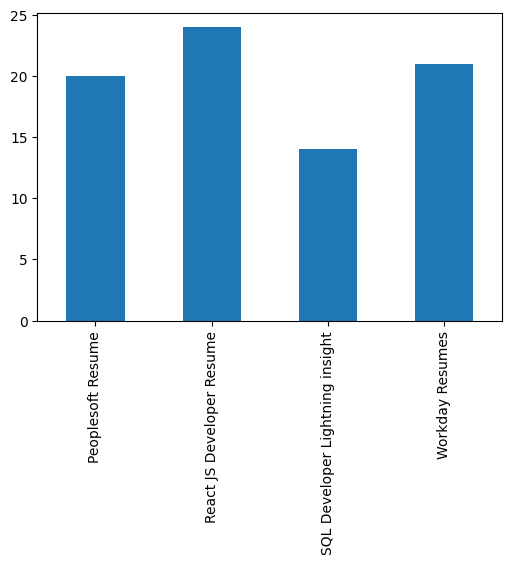

In [41]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(6, 4))
plt.show()

In [42]:
category_counts = data['Category'].value_counts()

In [43]:
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

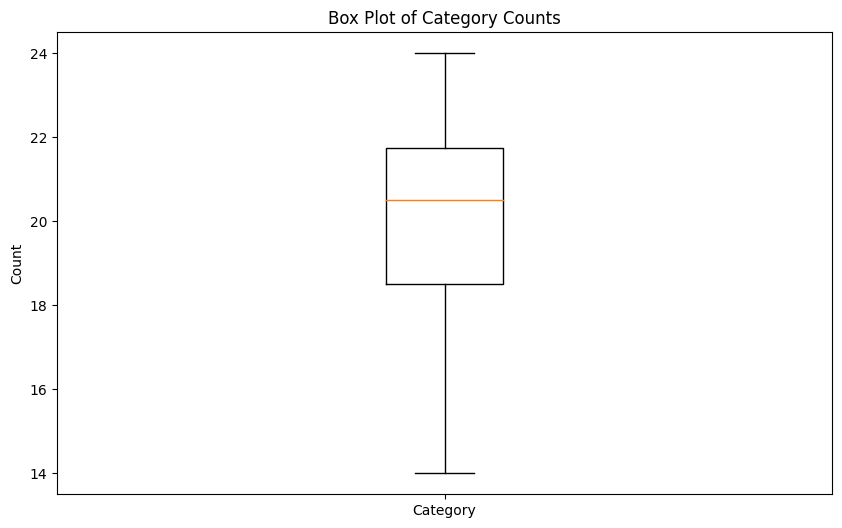

In [44]:
plt.figure(figsize=(10, 6))
plt.boxplot(category_counts_df['Count'])
plt.ylabel('Count')
plt.title('Box Plot of Category Counts')
plt.xticks(ticks=[1], labels=['Category'])
plt.show()

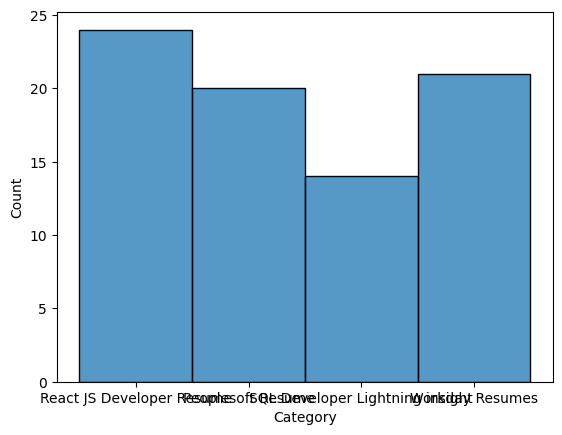

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Category'])
plt.show()

Text(0, 0.5, 'Count')

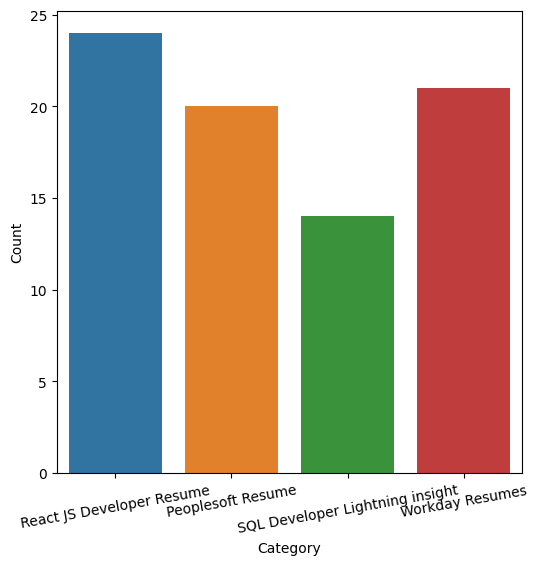

In [46]:
import seaborn as sns
plt.figure(figsize=(6,6))
plt.xticks(rotation=10)
sns.countplot(x="Category", data=data)
plt.xlabel('Category',fontsize=10)
plt.ylabel('Count',fontsize=10)

In [47]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('created', 150), ('testing', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('core', 128), ('studio', 128), ('work', 124), ('custom', 124), ('js', 123

(-0.5, 399.5, 199.5, -0.5)

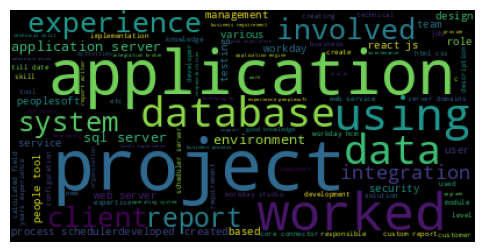

In [48]:
plt.figure(figsize=(6,6))
wordcloud = WordCloud(background_color='black').generate(cleanedSentences)
plt.imshow(wordcloud)
plt.axis('off')

In [49]:
categories = np.sort(data['Category'].unique())

In [50]:
data_categories = [data[data['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
data_categories

[                                              Resumes           Category
 24  peoplesoft administration vivekanand sayana ca...  Peoplesoft Resume
 25  peoplesoft administrator srinivas k experience...  Peoplesoft Resume
 26  hari narayana professional summary years exper...  Peoplesoft Resume
 27  arun venu experience summary experience years ...  Peoplesoft Resume
 28  murali professional summary years experience p...  Peoplesoft Resume
 29  rahul ahuja summary years experience peoplesof...  Peoplesoft Resume
 30  peoplesoft admin peoplesoft dba ganesh alladi ...  Peoplesoft Resume
 31  peoplesoft database administrator gangareddy p...  Peoplesoft Resume
 32  priyabrata hota career objective pursuing peop...  Peoplesoft Resume
 33  classification internal classification interna...  Peoplesoft Resume
 34  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft Resume
 35  personal details name pritam biswas date birth...  Peoplesoft Resume
 36  tanna sujatha objective seeking c

In [51]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
         ).generate(txt)

    return wordcloud

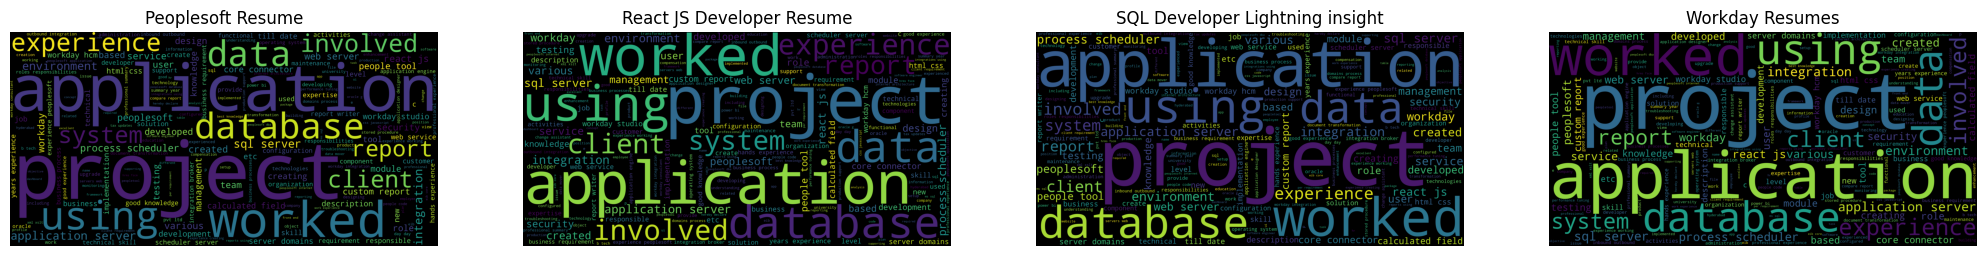

In [52]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [53]:
from sklearn.preprocessing import LabelEncoder
cat = ['Category']
for i in cat:
     data[i] = LabelEncoder().fit_transform(data[i])

In [54]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [55]:
data

,Resumes,category_1,category2,category3,category4,Category
0,ui developer react js developer name krishna p...,React JS Developer Resume,NaN,NaN,NaN,1
1,md khizaruddin rauf experience currently worki...,React JS Developer Resume,NaN,NaN,NaN,1
2,pragnya pattnaik expertise around years experi...,React JS Developer Resume,NaN,NaN,NaN,1
3,venkatalakshmi pedireddy software developer ex...,React JS Developer Resume,NaN,NaN,NaN,1
4,kotani durga prasad objective aspirant positio...,React JS Developer Resume,NaN,NaN,NaN,1
...,...,...,...,...,...,...
74,pic name j sumanth royal professional summary ...,NaN,NaN,NaN,Workday Resumes,3
75,harikrishna akula summary years experience aro...,NaN,NaN,NaN,Workday Resumes,3
76,mooraboyina guravaiah workday integration spec...,NaN,NaN,NaN,Workday Resumes,3
77,venkateswarlu b workday consultant years exper...,NaN,NaN,NaN,Workday Resumes,3


In [56]:
data.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

In [80]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer()
def lemmatize_text(text):
     a= [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
     return ' '.join(a)

In [62]:
data

,Resumes,category_1,category2,category3,category4,Category
0,ui developer react js developer name krishna p...,React JS Developer Resume,NaN,NaN,NaN,1
1,md khizaruddin rauf experience currently worki...,React JS Developer Resume,NaN,NaN,NaN,1
2,pragnya pattnaik expertise around years experi...,React JS Developer Resume,NaN,NaN,NaN,1
3,venkatalakshmi pedireddy software developer ex...,React JS Developer Resume,NaN,NaN,NaN,1
4,kotani durga prasad objective aspirant positio...,React JS Developer Resume,NaN,NaN,NaN,1
...,...,...,...,...,...,...
74,pic name j sumanth royal professional summary ...,NaN,NaN,NaN,Workday Resumes,3
75,harikrishna akula summary years experience aro...,NaN,NaN,NaN,Workday Resumes,3
76,mooraboyina guravaiah workday integration spec...,NaN,NaN,NaN,Workday Resumes,3
77,venkateswarlu b workday consultant years exper...,NaN,NaN,NaN,Workday Resumes,3


## Vectorization

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [64]:
requiredText = data['Resumes'].values
requiredCategory = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Task completed .....")

Task completed .....


## Data Splitting

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test,y_train,y_test = train_test_split(WordFeatures,requiredCategory,test_size=.25,random_state=0,stratify=requiredCategory)

In [67]:
x_train.shape, x_test.shape

((59, 4464), (20, 4464))

# **Model Building**

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [77]:
model1 = LogisticRegression().fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
score1 = accuracy_score(y_test,y_pred1)
print(score1)

0.9


In [83]:
c1= classification_report(y_test,y_pred1)
print(c1)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.89      0.90        20
weighted avg       0.93      0.90      0.90        20



## Multinomial NB

In [84]:
model2 = MultinomialNB().fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

In [85]:
c2= classification_report(y_test,y_pred2)
print(c2)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6
           2       1.00      0.50      0.67         4
           3       0.71      1.00      0.83         5

    accuracy                           0.85        20
   macro avg       0.89      0.82      0.83        20
weighted avg       0.89      0.85      0.84        20



## KNN Classifier

In [86]:
model3 = KNeighborsClassifier().fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

In [87]:
c3= classification_report(y_test,y_pred3)
print(c3)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       0.83      1.00      0.91         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



## Decision Tree Classifier

In [88]:
model4 = DecisionTreeClassifier().fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

In [89]:
c4 = classification_report(y_test,y_pred4)
print(c4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Support Vector Machine(Classifier)

In [90]:
model5 = SVC().fit(x_train,y_train)
y_pred5 = model5.predict(x_test)

In [91]:
c5= classification_report(y_test,y_pred5)
print(c5)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.89      0.90        20
weighted avg       0.93      0.90      0.90        20



## Random Forest Classifier

In [92]:
model6 = RandomForestClassifier().fit(x_train,y_train)
y_pred6 = model6.predict(x_test)

In [93]:
c6= classification_report(y_test,y_pred6)
print(c6)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## AdaBoostClassifier

In [94]:
model7= AdaBoostClassifier(random_state=1).fit(x_train,y_train)
y_pred7 = model7.predict(x_test)

In [95]:
c7= classification_report(y_test,y_pred7)
print(c7)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.70        20
   macro avg       0.62      0.69      0.63        20
weighted avg       0.60      0.70      0.62        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradiant Boosting Classifier

In [96]:
model8= GradientBoostingClassifier().fit(x_train,y_train)
y_pred8 = model8.predict(x_test)

In [97]:
c8 = classification_report(y_test,y_pred8)
print(c8)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [98]:
class1 = {'Classifier' : ['Logistic Regression', 'Multinomial Naive Bayes', 'KNN', 'Decision Tree', 'SVM', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier'],  'Accuracy' : [1.00, 0.90, 1.00, 0.95, 1.00, 1.00, 0.70, 0.95]}


In [99]:
Model = pd.DataFrame(class1)

In [100]:
Model

,Classifier,Accuracy
0,Logistic Regression,1.00
1,Multinomial Naive Bayes,0.90
2,KNN,1.00
3,Decision Tree,0.95
4,SVM,1.00
5,Random Forest Classifier,1.00
6,AdaBoost Classifier,0.70
7,Gradient Boosting Classifier,0.95


## Visualization Accuracy Score

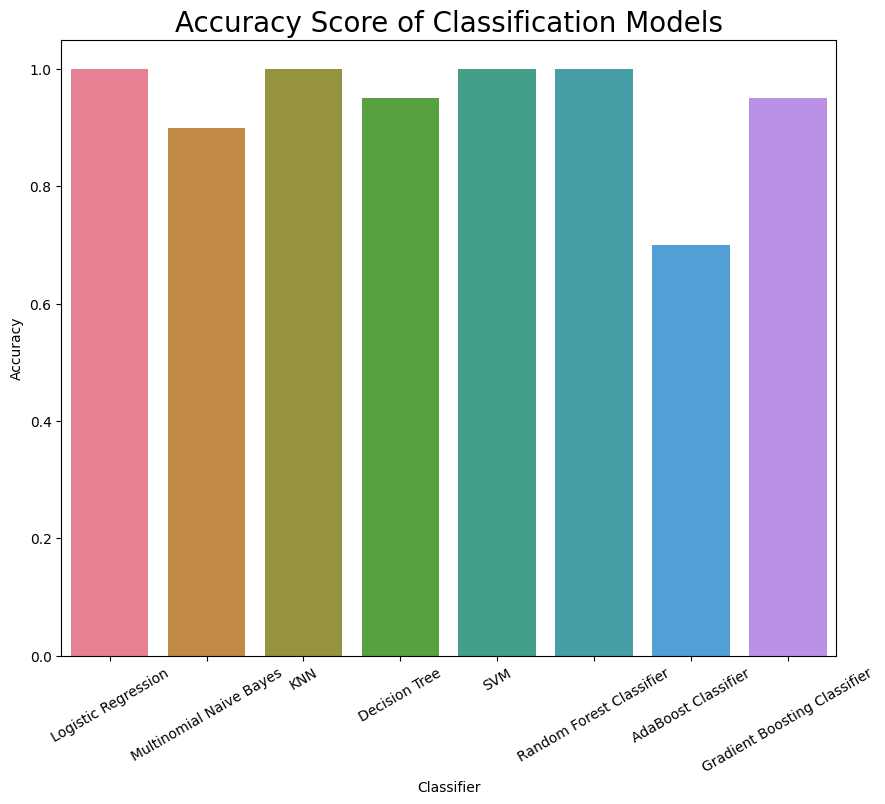

In [101]:
plt.figure(figsize=(10,8))
M=sns.barplot(x=Model.Classifier,y= Model.Accuracy, palette =sns.color_palette("husl", 9))
plt.xticks(rotation=30)

plt.title("Accuracy Score of Classification Models",size=20)
plt.ylabel("Accuracy")
plt.show()

## Model Deployment

In [102]:
import pickle
import os
from pickle import dump
from pickle import load

In [103]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=f37318a563cef206a13ecd6a6750bbb49da1598734f451ff78937bc513c76c08
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [104]:
import streamlit as st

In [105]:
dump(model6,open("RandomForestClassifier.pkl","wb"))

In [106]:
dump(word_vectorizer,open("vector.pkl","wb"))